In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import StandardScaler

##### **1. How do you calculate the mean, median, and mode of a dataset.**

In [3]:
data = np.random.randint(1,10,50)
data

array([1, 6, 5, 4, 3, 5, 4, 6, 7, 9, 8, 3, 1, 3, 4, 4, 9, 7, 7, 4, 5, 9,
       7, 8, 8, 3, 3, 9, 2, 7, 1, 5, 8, 7, 5, 3, 8, 6, 7, 7, 9, 7, 1, 1,
       3, 5, 7, 9, 7, 7], dtype=int32)

In [5]:
data.mean()

np.float64(5.48)

In [7]:
np.median(data)

np.float64(6.0)

In [8]:
statistics.mode(data)

np.int32(7)

##### **2. Generate a discrete uniform distribution using Python and plot the probability mass function (PMF)**

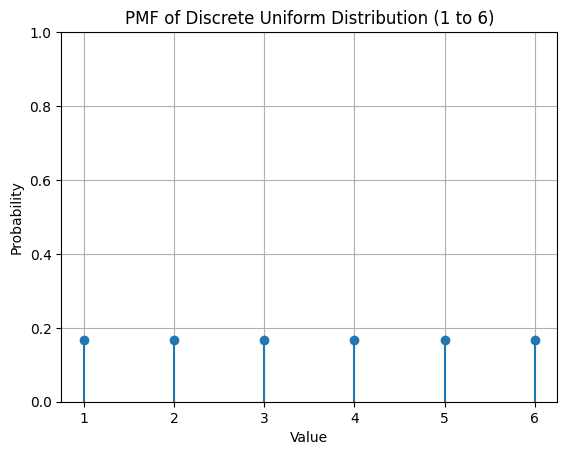

In [30]:
x = np.arange(1, 7)

pmf = np.full_like(x, 1/len(x), dtype=np.float64)

plt.stem(x, pmf, basefmt=" ")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF of Discrete Uniform Distribution (1 to 6)")
plt.xticks(x)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


##### **3. Create a dataset and classify it into nominal, ordinal, interval, and ratio types**

In [32]:
data = {
    "ID": [1, 2, 3, 4],
    "Name": ["Anya", "Ravi", "Meena", "Rohan"],
    "Gender": ["Female", "Male", "Female", "Male"],
    "Education Level": ["Bachelor's", "Master's", "PhD", "High School"],
    "Temperature (°C)": [36.5, 38.0, 37.2, 35.9],
    "Salary (₹)": [45000, 60000, 72500, 30000]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

types = {
    "ID": "Nominal",
    "Name": "Nominal",
    "Gender": "Nominal",
    "Education Level": "Ordinal",
    "Temperature (°C)": "Interval",
    "Salary (₹)": "Ratio"
}

print("\nClassification of Each Column:")
for column, dtype in types.items():
    print(f"{column}: {dtype}")


Dataset:

   ID   Name  Gender Education Level  Temperature (°C)  Salary (₹)
0   1   Anya  Female      Bachelor's              36.5       45000
1   2   Ravi    Male        Master's              38.0       60000
2   3  Meena  Female             PhD              37.2       72500
3   4  Rohan    Male     High School              35.9       30000

Classification of Each Column:
ID: Nominal
Name: Nominal
Gender: Nominal
Education Level: Ordinal
Temperature (°C): Interval
Salary (₹): Ratio


##### **4. Implement sampling techniques like random sampling and stratified sampling**

In [49]:
data = {
    "ID": [1, 2, 3, 4, 5, 6],
    "Name": ["Anya", "Ravi", "Meena", "Rohan", "Sara", "Amit"],
    "Gender": ["Female", "Male", "Female", "Male", "Female", "Male"],
    "Salary (₹)": [45000, 60000, 72500, 30000, 50000, 55000]
}
df = pd.DataFrame(data)

samples = df.sample(3, random_state=1)
samples

,ID,Name,Gender,Salary (₹)
2,3,Meena,Female,72500
1,2,Ravi,Male,60000
4,5,Sara,Female,50000


In [50]:
from sklearn.model_selection import train_test_split

stratified_sample, _ = train_test_split(df, test_size=0.5, stratify=df['Gender'], random_state=4)
stratified_sample

,ID,Name,Gender,Salary (₹)
5,6,Amit,Male,55000
1,2,Ravi,Male,60000
0,1,Anya,Female,45000


##### **5. Write a Python function to calculate the range of a dataset**

In [51]:
def calculate_range(data):
    if not data:
        return None  
    return max(data) - min(data)

sample_data = [10, 25, 8, 32, 17]
calculate_range(sample_data)

24

##### **6. Create a dataset and plot its histogram to visualize skewness**

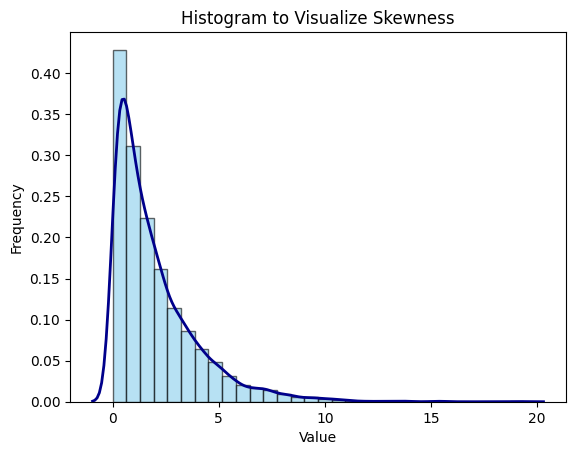

In [56]:
data = np.random.exponential(2, 10000)

plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.6, density=True)
sns.kdeplot(data, bw_adjust=1, color='darkblue', linewidth=2)
plt.title("Histogram to Visualize Skewness")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

##### **7. Calculate skewness and kurtosis of a dataset using Python libraries**

In [58]:
data = np.random.exponential(2, 1000)
stats.skew(data)

np.float64(2.0861824055458746)

In [59]:
stats.kurtosis(data)

np.float64(6.427745700097502)

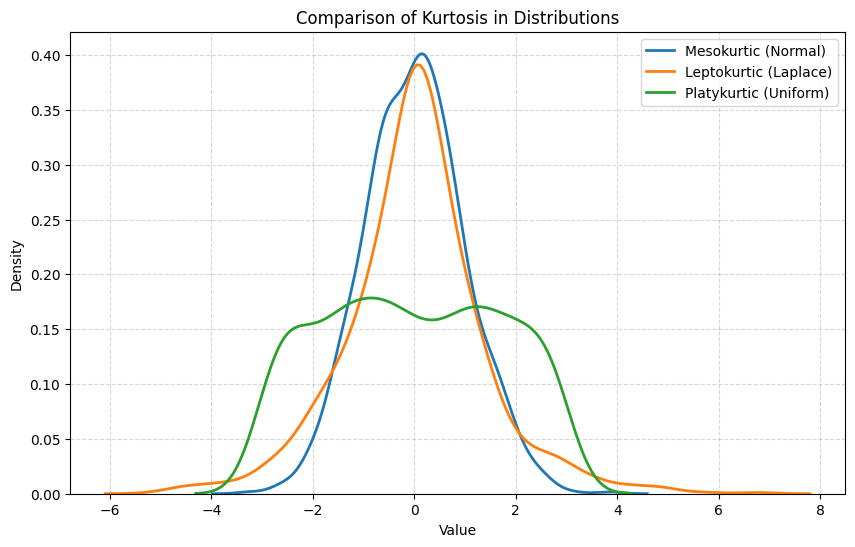

In [61]:
np.random.seed(42)

# Mesokurtic (Normal distribution, kurtosis ≈ 3)
meso = np.random.normal(loc=0, scale=1, size=1000)

# Leptokurtic (Sharper peak, heavy tails → higher kurtosis)
lepto = np.random.laplace(loc=0, scale=1, size=1000)

# Platykurtic (Flatter peak, light tails → lower kurtosis)
platy = np.random.uniform(low=-3, high=3, size=1000)

plt.figure(figsize=(10, 6))

sns.kdeplot(meso, label="Mesokurtic (Normal)", linewidth=2)
sns.kdeplot(lepto, label="Leptokurtic (Laplace)", linewidth=2)
sns.kdeplot(platy, label="Platykurtic (Uniform)", linewidth=2)

plt.title("Comparison of Kurtosis in Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

##### **8. Generate a dataset and demonstrate positive and negative skewness**

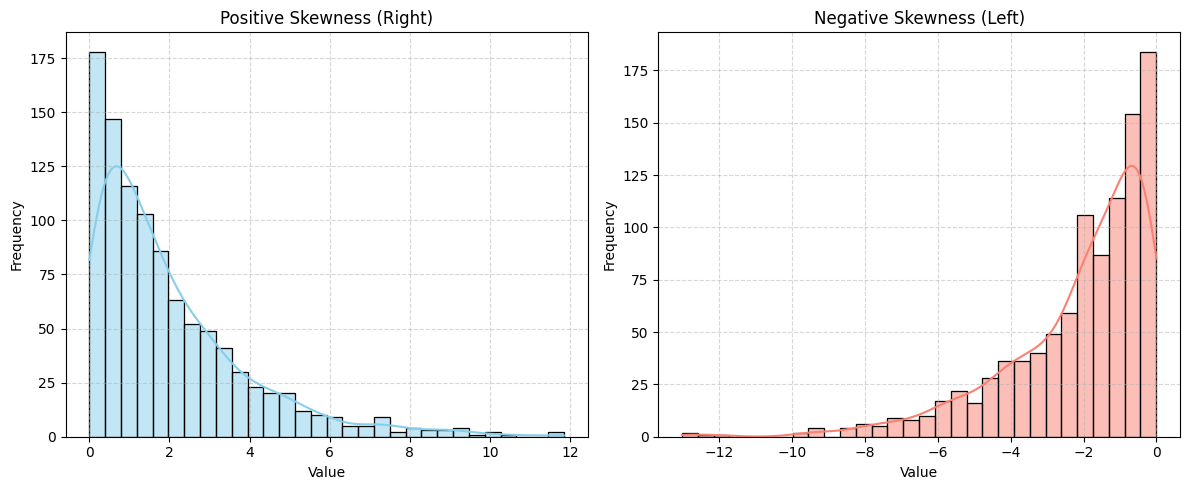

In [62]:
np.random.seed(1)

pos_skew = np.random.exponential(scale=2, size=1000)

neg_skew = -np.random.exponential(scale=2, size=1000)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(pos_skew, bins=30, kde=True, color='skyblue')
plt.title('Positive Skewness (Right)')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.histplot(neg_skew, bins=30, kde=True, color='salmon')
plt.title('Negative Skewness (Left)')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### **9. Write a Python script to calculate covariance between two datasets**

In [66]:
x = [2, 4, 6, 8, 10]
y = [1, 3, 5, 7, 9]

print('''[[Var(x), Cov(x, y)],
 [Cov(y, x), Var(y)]]''')
np.cov(x, y, ddof=1)

[[Var(x), Cov(x, y)],
 [Cov(y, x), Var(y)]]


array([[10., 10.],
       [10., 10.]])

##### **10. Write a Python script to calculate the correlation coefficient between two datasets**

In [80]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 55]
data = zip(x,y)

df = pd.DataFrame(data)

df.corr(method='pearson')

,0,1
0,1.0,1.0
1,1.0,1.0


In [81]:
df.corr(method='spearman')

,0,1
0,1.0,1.0
1,1.0,1.0


##### **11. Create a scatter plot to visualize the relationship between two variables**

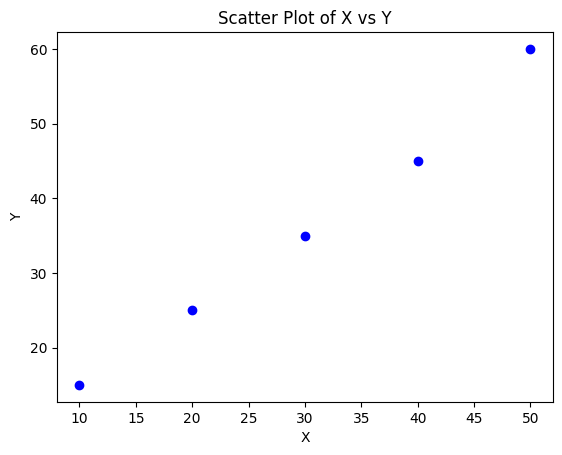

In [83]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 60]

plt.scatter(x, y, color='blue')
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### **12. Implement and compare simple random sampling and systematic sampling**

In [84]:
data = pd.DataFrame({'ID': range(1, 21)})

# Simple Random Sampling
data.sample(n=5, random_state=1)

,ID
3,4
16,17
6,7
10,11
2,3


In [85]:
# Systematic Sampling
step = len(data) // 5
data.iloc[::step]

,ID
0,1
4,5
8,9
12,13
16,17


##### **13. Calculate the mean, median, and mode of grouped data**

In [86]:
data = [15, 25, 25, 35, 35, 35, 45, 45, 55, 65]

mean_val = statistics.mean(data)
median_val = statistics.median(data)
mode_val = statistics.mode(data)

print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)

Mean: 38
Median: 35.0
Mode: 35


##### **14. Simulate data using Python and calculate its central tendency and dispersion**

In [87]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=12, size=200)
df = pd.DataFrame(data, columns=["Salary"])

# Central tendency
mean = df["Salary"].mean()
median = df["Salary"].median()
mode = df["Salary"].mode().iloc[0]

# Dispersion
std_dev = df["Salary"].std()
variance = df["Salary"].var()
range_val = df["Salary"].max() - df["Salary"].min()

print("Mean:", round(mean, 2))
print("Median:", round(median, 2))
print("Mode:", round(mode, 2))
print("Standard Deviation:", round(std_dev, 2))
print("Variance:", round(variance, 2))
print("Range:", round(range_val, 2))


Mean: 49.51
Median: 49.95
Mode: 18.56
Standard Deviation: 11.17
Variance: 124.81
Range: 64.08


##### **15. Use NumPy or pandas to summarize a dataset’s descriptive statistics**

In [88]:
df.describe()

,Salary
count,200.000000
mean,49.510748
std,11.172047
min,18.563059
25%,41.538468
50%,49.949697
75%,56.010230
max,82.642030


##### **16. Plot a boxplot to understand the spread and identify outliers**

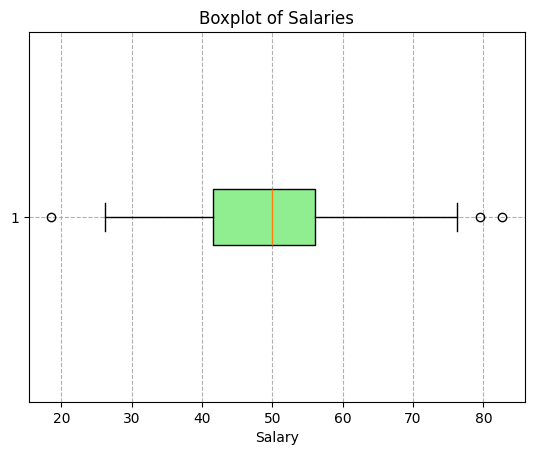

In [92]:
plt.boxplot(df["Salary"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot of Salaries")
plt.xlabel("Salary")
plt.grid(True, linestyle='--')
plt.show()

##### **17. Calculate the interquartile range (IQR) of a dataset**

In [93]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(14.471761775416432)

##### **18. Implement Z-score normalization and explain its significance**

In [102]:
data = {'Score': [45, 70, 85, 60, 90, 100, 75]}
df = pd.DataFrame(data)

scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.73205081],
       [-0.28867513],
       [ 0.57735027],
       [-0.8660254 ],
       [ 0.8660254 ],
       [ 1.44337567],
       [ 0.        ]])

In [103]:
data = {'Score': [45, 70, 85, 60, 90, 100, 75]}
df = pd.DataFrame(data)

# Z-score normalization
mean = df['Score'].mean()
std = df['Score'].std()
df['Z_Score'] = (df['Score'] - mean) / std

print(df)

   Score   Z_Score
0     45 -1.603567
1     70 -0.267261
2     85  0.534522
3     60 -0.801784
4     90  0.801784
5    100  1.336306
6     75  0.000000


In [ ]:
# Significance:
# Z-score normalization standardizes data by centering it around mean 0 and standard deviation 1.
# It helps compare features with different units/scales.

##### **19. Compare two datasets using their standard deviations**

In [104]:
data1 = [10, 20, 30, 40, 50]
data2 = [5, 25, 45, 65, 85]

std1 = np.std(data1, ddof=1)
std2 = np.std(data2, ddof=1)

print("Standard Deviation of Dataset 1:", round(std1, 2))
print("Standard Deviation of Dataset 2:", round(std2, 2))

# Interpretation: Higher standard deviation indicates more spread in the data.

Standard Deviation of Dataset 1: 15.81
Standard Deviation of Dataset 2: 31.62


##### **20. Write a Python program to visualize covariance using a heatmap**

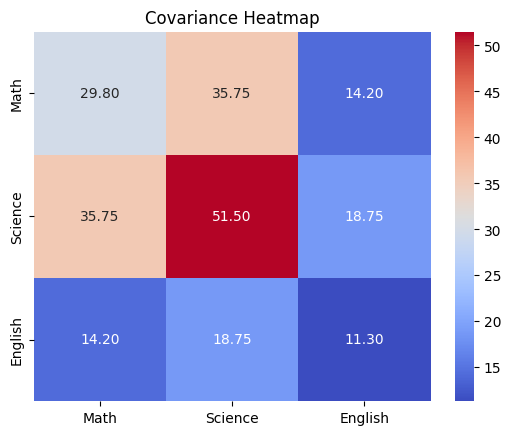

In [107]:
data = {
    'Math': [85, 90, 78, 92, 88],
    'Science': [82, 94, 75, 89, 85],
    'English': [78, 85, 80, 86, 83]
}
df = pd.DataFrame(data)

cov_matrix = df.cov()

sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Heatmap")
plt.show()

##### **21. Use seaborn to create a correlation matrix for a dataset**

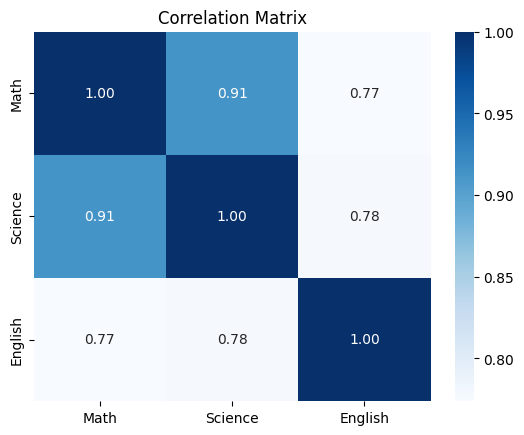

In [108]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()